### K nearest neighbors Algorithm:

It's a supervised machine learning algorithm!

We have K neighbors that we need to consider while calculating the label and if it's a regression problem, we need to consider the average of the labels of K neighbors and if it's a classification problem, then we need to apply the majority voting among the classes in the K neighbors.

How do you find out the nearest neighbors:

We have various kind of distance measures that's available to find out the K nearest neighbors!

Most famous distance measure is Euclidean distance which is the square root of the squared difference between the two points!





If the points are (x1,x2) and (z1,z2) then the Euclidean distance between them will become 
\begin{equation*}
\sqrt{(z1-x1)^2+(z2-x2)^2}
\end{equation*}

The default distance metric used in sklearn is Minkowski distance with p=2 which is equivalent to the Eudlidean distance
\begin{equation*}
{\displaystyle D\left(X,Y\right)=\left(\sum _{i=1}^{n}|x_{i}-y_{i}|^{p}\right)^{\frac {1}{p}}.}
\end{equation*}

### Type of Problem:
   
Now we need to get to know about the type of problem that we are solving: either regression or the classification!

what's actually the difference:<br>
    Regression is something where the labels are quantitative values like a number that actually represents something like the price of an item etc.<br>
    
Classification is something where the labels belongs to a class of values like whether it's a yes or no , if it's a binary problem or is it something that belongs to a group of classes like type of bikes or cars etc.
    

##### how will you determine the label in case of Regression problem and a classification problem?

In case of regression, we will consider the K neighbors labels and average them to get the predicted label.

In case of classification, we will consider the K neighbors labels and do a majority voting such that we will predict the label's class to be the majority class among the K neighbors.

If there's a tie, we can apply any tie breaking strategy to predict the outcome!


Let's work on this algorithm in real!

Initially, loading up the required libraries! numpy is used for various mathematical operations! <br>
sklearn.datasets contain various toy datasets <br>
sklearn.model_selection contains all the functions related to working on various datasets!<br>

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


now, in the below code, iris variable stores the entire dataset along with it's description etc which is actually a bunch object 
which is just like a dictionary of various attributes!

In [2]:
iris=load_iris()

iris now contains data and target array with the values of the data and the labels, a descr which explains what's this dataset is all about and feature_names containing what does each column in the dataset represents and target_names like what does the target values or the labels mean!


Iris dataset is basically a classification type of problem where the labels are the type of Iris flower which is classified as Setosa, Versicolor or virginica depending on the features like sepal and petal's length and width! we can actually witness the data using matplotlib!

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


Text(0, 0.5, 'sepal width')

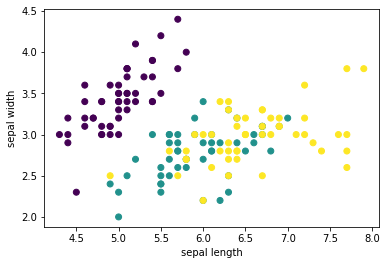

In [4]:
plt.scatter(iris['data'][:,0],iris['data'][:,1],c=iris['target'])
plt.xlabel('sepal length')
plt.ylabel('sepal width')

We can see that in the two dimensional space, the data is organized as various classes and each color here indicates one target class.

Below are the various target classes that we can get and these are labeled values in target data like 0 to be setosa, 1 to be versicolor and 2 to be virginica!

In [5]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


In [6]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


We have a total of 150 rows of data out of which we need few of them to be out training set and few to be our testing set! Now for this we need to split the data and this can be done with the help of train_test_split function of sklearn! <br>

This will result in 4 variables which are to be stored as X_train, X_test,y_train and y_test! The X's indicates the feature related data and the y's indicate the labels!

In [7]:
print(iris['data'].shape)

(150, 4)


In [8]:
print(iris['target'].shape)

(150,)


In [9]:
X_train,X_test,y_train,y_test=train_test_split(iris['data'],iris['target'],random_state=0)


In [10]:
print(X_train.shape,y_train.shape)

(112, 4) (112,)


In [11]:
print(X_test.shape,y_test.shape)

(38, 4) (38,)


Now, I'm building the K Nearest Neighbors Classifier model to predict the target type depending on the sepal and petal length and width.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)


Now, the model is been loaded with the neighbors value set to 1 which mean that only the nearest neighbor influences the model's prediction. Now, in the next steps, I will fit the model on my training data, remember that the model is needed to be fit on the training data and predictions are needed to be done on the testing data. Let's see this in action!

In [13]:
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

Now, the model is fitted on the training data and now we can call predict method over the testing dataset.

In [14]:
y_pred=knn.predict(X_test)

In [15]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [16]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

remember that y_pred is our predictions made from the model knn and y_test are the true or original labels, now we need to compare them to get the accuracy of our model predictions

This is a great measure of score where we just compare the predicted and true labels and find the mean which tells us out of all the labels, how much of them are actually equal to the predictions!
This is a good measure metric for the classification problems!

In [17]:
np.mean(y_pred==y_test)

0.9736842105263158

Well, we can use default method by scikit learn to get to know about the accuracy.

In [18]:
knn.score(X_test,y_test)

0.9736842105263158

Now, let's build another model with nearest neighbors as 3, we just need to keep the n_neighbors value to be 3 for this model!


In [19]:
knn3=KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train,y_train)
y_pred3=knn3.predict(X_test)
print('The accuracy is ', np.mean(y_pred3==y_test))

The accuracy is  0.9736842105263158


In [20]:
y_pred3

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

There's not much difference in terms of improvement in accuracy.

This is the first notebook of mine and in the next notebook, I will check on various algorithms 

## How to explain KNN for a 5 year old!

Consider the homes in a country but each home belongs to a particular state and to decide the state of any new home, we choose the nearest neighbor for that home and assign that state to the new home which is fair and if we want to be more accurate  then we choose to have more than one neighbor during calculation and assign depending on whose state's neighbors are high among K neighbors!

## What about bias and variance for KNN: 

Bias is related to how much the model is able to find out the actual true patterns in the data and variance is related to how accurate the model finds out for a new dataset!

If the K value is low then there's a higher variance because the model will be finding out nearest neighbors which changes for each test label whereas if the K value is higher, then there's chance that the model tries to classify generally a border so that it would work fine even with a new dataset!

So, increasing K will lead to decrease in variance and a slight chance of increasing in bias!
